# Animation of 3D models generated by spateo

In [1]:
import io, warnings, os
from pathlib import Path
import base64
from IPython.display import HTML

import spateo as st
warnings.filterwarnings('ignore')

2024-05-26 22:31:39.147652: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/pc001/anaconda3/envs/BioProjects/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/home/pc001/anaconda3/envs/BioProjects/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behav

## Load the data

In [2]:
os.chdir(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart")
out_image_path = f"animations/mouse_E11.5_models"
Path(out_image_path).mkdir(parents=True, exist_ok=True)

In [3]:
cpo = "xz"
 
sample_id, anno_key, spatial_key = "E11.5", "mapped_celltype", "3d_align_spatial"
embryo_pc = st.tdr.read_model(f"figure1/embryo_h5ad/Mouse_{sample_id}_full_data_600k_pc_model.vtk")
embryo_mesh = st.tdr.read_model(f"figure1/embryo_h5ad/Mouse_{sample_id}_full_data_600k_mesh_model.vtk")

In [4]:
st.tdr.rotate_model(model=embryo_pc, angle=(90, 0, 0), rotate_center=embryo_pc.center, inplace=True)
st.tdr.rotate_model(model=embryo_mesh, angle=(90, 0, 0), rotate_center=embryo_pc.center, inplace=True)

In [5]:
st.tdr.rotate_model(model=embryo_pc, angle=(0, 0, 180), rotate_center=embryo_pc.center, inplace=True)
st.tdr.rotate_model(model=embryo_mesh, angle=(0, 0, 180), rotate_center=embryo_pc.center, inplace=True)

## Point clouds

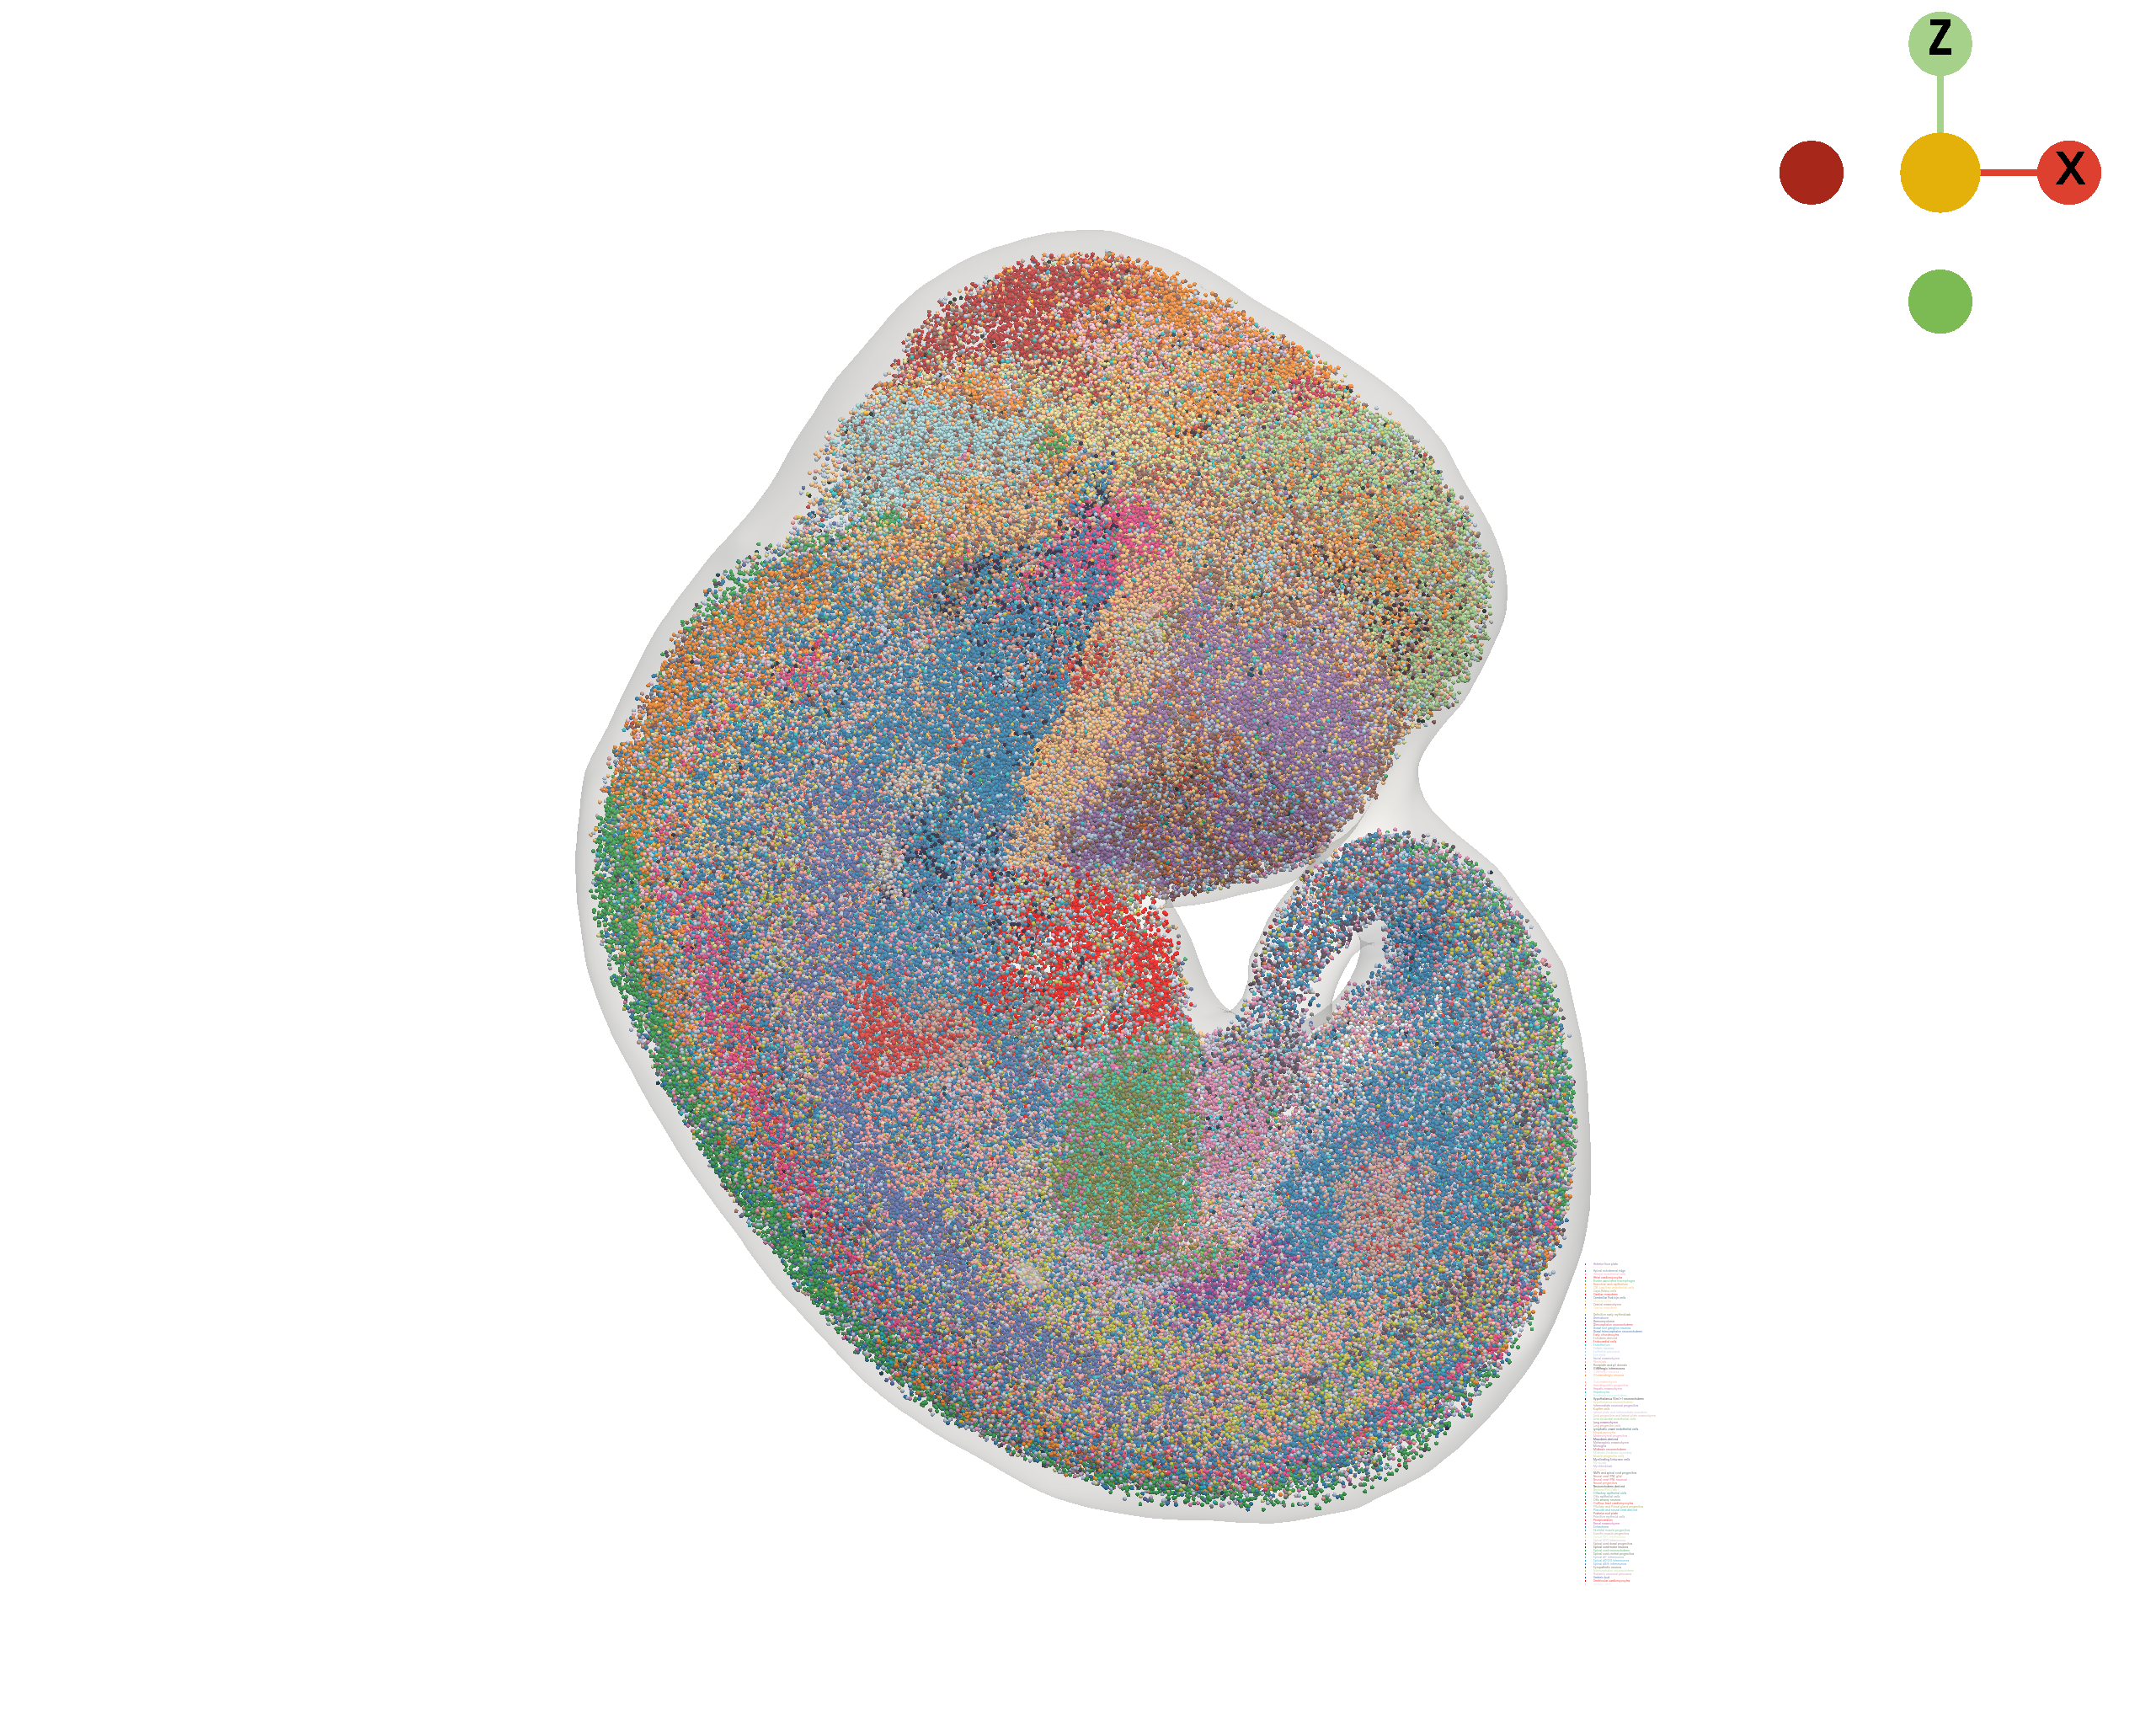

In [6]:
st.pl.three_d_plot(
        model=st.tdr.collect_models([embryo_mesh, embryo_pc]),
        key=anno_key,
        model_size=5,
        model_style=["surface", "points"],
        opacity=[0.24, 1],
        background="white",
        cpo="xz",
        window_size=(2560, 2048),
        jupyter="static",
    )

## Animate 3D models

In [7]:
st.pl.three_d_plot(
    model=st.tdr.collect_models([embryo_mesh, embryo_pc]),
    key=anno_key,
    filename=os.path.join(out_image_path, f"{sample_id}_embryo_pc_model_animation.mp4"),
    model_size=5,
    model_style=["surface", "points"],
    opacity=[0.24, 1],
    show_legend=True,
    off_screen=False,
    jupyter="static",
    background="white",
    window_size=(2560, 2048),
    cpo="xz",
    text=f"\nPC Model of Whole Embryo (Mouse E11.5)",
    text_kwargs={"font_size": 20},
    view_up=(0, 0, 1),
    framerate=6
)

In [8]:
st.pl.merge_animations(
    mp4_files=[
        f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/animations/mouse_E9.5_models/E9.5_embryo_pc_model_animation.mp4",
        f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/animations/mouse_E11.5_models/E11.5_embryo_pc_model_animation.mp4",
    ],
    filename=os.path.join("animations", f"Mouse_two_stages_models_merged_animation.mp4"),
)

Moviepy - Building video animations/Mouse_two_stages_models_merged_animation.mp4.
Moviepy - Writing video animations/Mouse_two_stages_models_merged_animation.mp4



Moviepy - Done !
Moviepy - video ready animations/Mouse_two_stages_models_merged_animation.mp4
